In this notebook I am going to teach models on data from <br>
https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data

I intend to use the following classifiers:
<ul>
<li>Logistic regression</li>
<li>K nearest neighbors</li>
<li>Decision tree</li>
<li>Random forests</li>
<li>Naive Bayes classifier</li>
<li>Support vector machine</li>
</ul>
I intend to teach the models on different amounts of input data, and then make a comparative analysis of the results obtained for the classifiers depending on the data provided for learning.

In [129]:
import pandas as pd
import numpy as np
import plotly.express as px

In [130]:
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_learning/ML_Projects/data/fish_data.csv')
df_raw.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [131]:
df = df_raw.copy()
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [132]:
df.duplicated().sum()

109

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    3971 non-null   object 
 1   length     3971 non-null   float64
 2   weight     3971 non-null   float64
 3   w_l_ratio  3971 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.1+ KB


In [135]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [136]:
df.describe(include='object')

,species
count,3971
unique,9
top,Setipinna taty
freq,476


In [137]:
df.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [138]:
df.isna().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [139]:
df.groupby('species').mean()

,length,weight,w_l_ratio
species,,,
Anabas testudineus,8.180736,3.271342,0.406255
Coilia dussumieri,24.346870,2.748240,0.113007
Otolithoides biauritus,18.556425,3.198838,0.172961
Otolithoides pama,21.798738,3.849393,0.177173
Pethia conchonius,9.616322,4.585595,0.485264
Polynemus paradiseus,12.952401,3.990286,0.313150
Puntius lateristriga,13.056427,2.632481,0.203474
Setipinna taty,17.812458,3.101366,0.174412
Sillaginopsis panijus,31.072028,6.143263,0.198182


In [140]:
targets_mapped = dict(zip(df['species'].unique(), range(0, len(df['species'].unique()))))
targets_mapped

{'Anabas testudineus': 0,
 'Coilia dussumieri': 1,
 'Otolithoides biauritus': 2,
 'Otolithoides pama': 3,
 'Pethia conchonius': 4,
 'Polynemus paradiseus': 5,
 'Puntius lateristriga': 6,
 'Setipinna taty': 7,
 'Sillaginopsis panijus': 8}

In [141]:
px.histogram(df, x='species')

In [142]:
df['species'] = df['species'].map(targets_mapped).astype(float)
df.head()

,species,length,weight,w_l_ratio
0,0.0,10.66,3.45,0.32
1,0.0,6.91,3.27,0.47
2,0.0,8.38,3.46,0.41
3,0.0,7.57,3.36,0.44
4,0.0,10.83,3.38,0.31


In [143]:
target = df.pop('species')
features = df.drop('w_l_ratio', axis=1)
features

,length,weight
0,10.66,3.45
1,6.91,3.27
2,8.38,3.46
3,7.57,3.36
4,10.83,3.38
...,...,...
4074,30.61,6.08
4075,30.56,6.12
4076,29.66,6.11
4077,32.81,6.25


In [144]:
def complete_scores(features, target, train_size):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report


    classification_scores = {}
    features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=train_size, stratify=target)

    print('features_train shape:', features_train.shape)
    print('features_test shape:', features_test.shape)
    print('target_train shape:', target_train.shape)
    print('target_test shape:', target_test.shape)
    print()
    print()

    # Logistic regression
    lr = LogisticRegression()
    lr_params = {
        'max_iter': [3000, 4000, 5000],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
    }
    lr_grid = GridSearchCV(lr, lr_params, cv=3)
    lr_grid.fit(features_train, target_train)
    lr_pred = lr_grid.predict(features_test)
    lr_score = lr_grid.score(features_test, target_test)
    classification_scores['Logistic regression'] = round(lr_score, 4)
    print('************************')
    print(f'Logistic regression best params: {lr_grid.best_params_}')
    print('************************')
    print('Logistic regression classification report')
    print(classification_report(target_test, lr_pred))
    print('************************')
    print('************************')
    print('************************')

    # KNN
    knn = KNeighborsClassifier()
    knn_params = {
        'n_neighbors': range(3, 7),
    }
    knn_grid = GridSearchCV(knn, knn_params, cv=3)
    knn_grid.fit(features_train, target_train)
    knn_pred = knn_grid.predict(features_test)
    knn_score = knn_grid.score(features_test, target_test)
    classification_scores['KNN'] = round(knn_score, 4)
    print('************************')
    print(f'KNN best params: {knn_grid.best_params_}')
    print('************************')
    print('KNN classification report')
    print(classification_report(target_test, knn_pred))
    print('************************')
    print('************************')
    print('************************')

    # Decision tree
    dt = DecisionTreeClassifier()
    dt_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(3, 10),
        'min_samples_split': range(2, 6),
        'min_samples_leaf': range(1, 6)
    }
    dt_grid = GridSearchCV(dt, dt_params, cv=3)
    dt_grid.fit(features_train, target_train)
    dt_pred = dt_grid.predict(features_test)
    dt_score = dt_grid.score(features_test, target_test)
    classification_scores['Decision Tree'] = round(dt_score, 4)
    print('************************')
    print(f'Decision tree best params: {dt_grid.best_params_}')
    print('************************')
    print('Decision tree classification report')
    print(classification_report(target_test, dt_pred))
    print('************************')
    print('************************')
    print('************************')

    # Random forest
    rf = RandomForestClassifier()
    rf_params = {
        'criterion': ['gini', 'entropy'],
        'n_estimators': range(50, 101, 10),
        'max_depth': range(3, 10),
        'min_samples_split': range(3, 6),
        'min_samples_leaf': range(3, 6)
    }
    rf_grid = GridSearchCV(rf, rf_params, cv=3)
    rf_grid.fit(features_train, target_train)
    rf_pred = rf_grid.predict(features_test)
    rf_score = rf_grid.score(features_test, target_test)
    classification_scores['Random Forest'] = round(rf_score, 4)
    print('************************')
    print(f'Random forest best params: {rf_grid.best_params_}')
    print('************************')
    print('Random forest classification report')
    print(classification_report(target_test, rf_pred))
    print('************************')
    print('************************')
    print('************************')

    # Naive Bayes
    bayes = GaussianNB()
    bayes.fit(features_train, target_train)
    bayes_pred = bayes.predict(features_test)
    bayes_score = bayes.score(features_test, target_test)
    classification_scores['Naive Bayes'] = round(bayes_score, 4)
    print('************************')
    print('Naive Bayes classification report')
    print(classification_report(target_test, bayes_pred))
    print('************************')
    print('************************')
    print('************************')

    # Support Vector Machine
    svc = SVC()
    svc_params = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }
    # Based on my previous experience, this classifier take a lot of time so
    # there will be only 2 cross validation
    svc_grid = GridSearchCV(svc, svc_params, cv=2)
    svc_grid.fit(features_train, target_train)
    svc_pred = svc_grid.predict(features_test)
    svc_score = svc_grid.score(features_test, target_test)
    classification_scores['Support Vector Machine'] = round(svc_score, 4)
    print('************************')
    print(f'Support vector machine best params: {svc_grid.best_params_}')
    print('************************')
    print('Support vector machine classification report')
    print(classification_report(target_test, svc_pred))
    print('************************')
    print('************************')
    print('************************')

    print('Classification scores:')
    print(classification_scores)
    return classification_scores


In [145]:
scores_75 = complete_scores(features, target, 0.75)

features_train shape: (2978, 2)
features_test shape: (993, 2)
target_train shape: (2978,)
target_test shape: (993,)


************************
Logistic regression best params: {'max_iter': 3000, 'solver': 'lbfgs'}
************************
Logistic regression classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       116
         1.0       1.00      1.00      1.00       102
         2.0       0.69      0.53      0.60       114
         3.0       0.98      1.00      0.99       107
         4.0       0.99      1.00      1.00       114
         5.0       1.00      0.98      0.99       113
         6.0       1.00      1.00      1.00       101
         7.0       0.64      0.77      0.70       119
         8.0       1.00      1.00      1.00       107

    accuracy                           0.92       993
   macro avg       0.92      0.92      0.92       993
weighted avg       0.92      0.92      0.91       993

**************

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Decision tree best params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}
************************
Decision tree classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       116
         1.0       0.98      0.99      0.99       102
         2.0       0.73      0.85      0.79       114
         3.0       0.99      0.98      0.99       107
         4.0       1.00      1.00      1.00       114
         5.0       1.00      0.99      1.00       113
         6.0       1.00      1.00      1.00       101
         7.0       0.83      0.71      0.76       119
         8.0       1.00      1.00      1.00       107

    accuracy                           0.94       993
   macro avg       0.95      0.95      0.95       993
weighted avg       0.95      0.94      0.94       993

************************
************************
************************


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Random forest best params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 90}
************************
Random forest classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       116
         1.0       0.99      0.99      0.99       102
         2.0       0.76      0.84      0.80       114
         3.0       0.99      0.99      0.99       107
         4.0       1.00      1.00      1.00       114
         5.0       1.00      1.00      1.00       113
         6.0       1.00      1.00      1.00       101
         7.0       0.83      0.74      0.78       119
         8.0       1.00      1.00      1.00       107

    accuracy                           0.95       993
   macro avg       0.95      0.95      0.95       993
weighted avg       0.95      0.95      0.95       993

************************
************************
************************

In [146]:
px.bar(x=scores_75.keys(), y=scores_75.values(), labels={'x': 'Model', 'y': 'Accuracy'}, title='Scores for test size=75%')

In [147]:
scores_50 = complete_scores(features, target, 0.5)
px.bar(x=scores_50.keys(), y=scores_50.values(), labels={'x': 'Model', 'y': 'Accuracy'}, title='Scores for test size=50%')

features_train shape: (1985, 2)
features_test shape: (1986, 2)
target_train shape: (1985,)
target_test shape: (1986,)


************************
Logistic regression best params: {'max_iter': 3000, 'solver': 'sag'}
************************
Logistic regression classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       231
         1.0       1.00      1.00      1.00       205
         2.0       0.74      0.52      0.61       228
         3.0       1.00      1.00      1.00       214
         4.0       0.97      1.00      0.98       227
         5.0       1.00      0.96      0.98       227
         6.0       1.00      1.00      1.00       201
         7.0       0.64      0.82      0.72       238
         8.0       1.00      1.00      1.00       215

    accuracy                           0.92      1986
   macro avg       0.93      0.92      0.92      1986
weighted avg       0.92      0.92      0.92      1986

**************

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Decision tree best params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
************************
Decision tree classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00       205
         2.0       0.68      0.73      0.70       228
         3.0       1.00      1.00      1.00       214
         4.0       1.00      1.00      1.00       227
         5.0       1.00      1.00      1.00       227
         6.0       1.00      1.00      1.00       201
         7.0       0.72      0.67      0.70       238
         8.0       1.00      1.00      1.00       215

    accuracy                           0.93      1986
   macro avg       0.93      0.93      0.93      1986
weighted avg       0.93      0.93      0.93      1986

************************
************************
************************


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Random forest best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 90}
************************
Random forest classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       231
         1.0       1.00      1.00      1.00       205
         2.0       0.67      0.89      0.76       228
         3.0       1.00      1.00      1.00       214
         4.0       1.00      1.00      1.00       227
         5.0       1.00      1.00      1.00       227
         6.0       1.00      1.00      1.00       201
         7.0       0.84      0.58      0.69       238
         8.0       1.00      1.00      1.00       215

    accuracy                           0.94      1986
   macro avg       0.94      0.94      0.94      1986
weighted avg       0.94      0.94      0.93      1986

************************
************************
************************

In [148]:
scores_25 = complete_scores(features, target, 0.25)
px.bar(x=scores_25.keys(), y=scores_25.values(), labels={'x': 'Model', 'y': 'Accuracy'}, title='Scores for test size=25%')

features_train shape: (992, 2)
features_test shape: (2979, 2)
target_train shape: (992,)
target_test shape: (2979,)


************************
Logistic regression best params: {'max_iter': 4000, 'solver': 'sag'}
************************
Logistic regression classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       347
         1.0       1.00      0.99      1.00       307
         2.0       0.76      0.44      0.56       342
         3.0       0.98      1.00      0.99       321
         4.0       0.97      0.99      0.98       341
         5.0       0.99      0.96      0.97       340
         6.0       1.00      1.00      1.00       302
         7.0       0.62      0.87      0.73       357
         8.0       1.00      1.00      1.00       322

    accuracy                           0.91      2979
   macro avg       0.92      0.92      0.91      2979
weighted avg       0.92      0.91      0.91      2979

****************

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Random forest best params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 90}
************************
Random forest classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       347
         1.0       1.00      0.99      1.00       307
         2.0       0.70      0.75      0.73       342
         3.0       0.99      1.00      1.00       321
         4.0       1.00      1.00      1.00       341
         5.0       1.00      1.00      1.00       340
         6.0       1.00      1.00      1.00       302
         7.0       0.75      0.69      0.72       357
         8.0       1.00      1.00      1.00       322

    accuracy                           0.93      2979
   macro avg       0.94      0.94      0.94      2979
weighted avg       0.93      0.93      0.93      2979

************************
************************
************************

In [149]:
scores_10 = complete_scores(features, target, 0.1)
px.bar(x=scores_10.keys(), y=scores_10.values(), labels={'x': 'Model', 'y': 'Accuracy'}, title='Scores for test size=10%')

features_train shape: (397, 2)
features_test shape: (3574, 2)
target_train shape: (397,)
target_test shape: (3574,)


************************
Logistic regression best params: {'max_iter': 3000, 'solver': 'sag'}
************************
Logistic regression classification report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       416
         1.0       1.00      1.00      1.00       368
         2.0       0.76      0.38      0.51       410
         3.0       0.97      0.99      0.98       385
         4.0       0.96      0.99      0.97       409
         5.0       0.98      0.95      0.97       409
         6.0       1.00      1.00      1.00       363
         7.0       0.61      0.89      0.73       428
         8.0       1.00      1.00      1.00       386

    accuracy                           0.91      3574
   macro avg       0.92      0.91      0.91      3574
weighted avg       0.92      0.91      0.90      3574

****************

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Random forest best params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60}
************************
Random forest classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       416
         1.0       0.99      0.99      0.99       368
         2.0       0.73      0.67      0.70       410
         3.0       0.98      0.99      0.99       385
         4.0       1.00      1.00      1.00       409
         5.0       1.00      0.99      1.00       409
         6.0       0.99      1.00      1.00       363
         7.0       0.71      0.76      0.73       428
         8.0       1.00      1.00      1.00       386

    accuracy                           0.93      3574
   macro avg       0.93      0.93      0.93      3574
weighted avg       0.93      0.93      0.93      3574

************************
************************
************************
**

In [150]:
scores_5 = complete_scores(features, target, 0.05)
px.bar(x=scores_5.keys(), y=scores_5.values(), labels={'x': 'Model', 'y': 'Accuracy'}, title='Scores for test size=5%')

features_train shape: (198, 2)
features_test shape: (3773, 2)
target_train shape: (198,)
target_test shape: (3773,)


************************
Logistic regression best params: {'max_iter': 3000, 'solver': 'saga'}
************************
Logistic regression classification report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       439
         1.0       0.99      1.00      1.00       389
         2.0       0.91      0.26      0.41       433
         3.0       0.94      1.00      0.96       407
         4.0       0.94      0.95      0.95       431
         5.0       0.95      0.92      0.94       431
         6.0       1.00      1.00      1.00       383
         7.0       0.60      0.98      0.75       452
         8.0       1.00      1.00      1.00       408

    accuracy                           0.90      3773
   macro avg       0.92      0.90      0.89      3773
weighted avg       0.92      0.90      0.88      3773

***************

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



************************
Random forest best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
************************
Random forest classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       439
         1.0       1.00      0.99      1.00       389
         2.0       0.70      0.74      0.72       433
         3.0       0.99      1.00      1.00       407
         4.0       1.00      1.00      1.00       431
         5.0       1.00      1.00      1.00       431
         6.0       1.00      1.00      1.00       383
         7.0       0.74      0.69      0.72       452
         8.0       1.00      1.00      1.00       408

    accuracy                           0.93      3773
   macro avg       0.94      0.94      0.94      3773
weighted avg       0.93      0.93      0.93      3773

************************
************************
************************
*

### Score analysis for every classifier, depends on train size

In [151]:
log_reg_scores = {
    '75%': scores_75['Logistic regression'],
    '50%': scores_50['Logistic regression'],
    '25%': scores_25['Logistic regression'],
    '10%': scores_10['Logistic regression'],
    '5%': scores_5['Logistic regression']
}
knn_scores = {
    '75%': scores_75['KNN'],
    '50%': scores_50['KNN'],
    '25%': scores_25['KNN'],
    '10%': scores_10['KNN'],
    '5%': scores_5['KNN']
}
decision_tree_scores = {
    '75%': scores_75['Decision Tree'],
    '50%': scores_50['Decision Tree'],
    '25%': scores_25['Decision Tree'],
    '10%': scores_10['Decision Tree'],
    '5%': scores_5['Decision Tree']
}
random_forest_scores = {
    '75%': scores_75['Random Forest'],
    '50%': scores_50['Random Forest'],
    '25%': scores_25['Random Forest'],
    '10%': scores_10['Random Forest'],
    '5%': scores_5['Random Forest']
}
naive_bayes_scores = {
    '75%': scores_75['Naive Bayes'],
    '50%': scores_50['Naive Bayes'],
    '25%': scores_25['Naive Bayes'],
    '10%': scores_10['Naive Bayes'],
    '5%': scores_5['Naive Bayes']
}
svc_scores = {
    '75%': scores_75['Support Vector Machine'],
    '50%': scores_50['Support Vector Machine'],
    '25%': scores_25['Support Vector Machine'],
    '10%': scores_10['Support Vector Machine'],
    '5%': scores_5['Support Vector Machine']
}

In [152]:
px.line(x=log_reg_scores.keys(), y=log_reg_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='Logistic regression')

In [153]:
px.line(x=knn_scores.keys(), y=knn_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='KNN')

In [154]:
px.line(x=decision_tree_scores.keys(), y=decision_tree_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='Decision tree')

In [155]:
px.line(x=random_forest_scores.keys(), y=random_forest_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='Random forest')

In [156]:
px.line(x=naive_bayes_scores.keys(), y=naive_bayes_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='Naive Bayes')

In [157]:
px.line(x=svc_scores.keys(), y=svc_scores.values(), labels={'x': 'Train size', 'y': 'Accuracy'}, title='Support Vector Machine')

Best scores for each used classifier:
<ul>
<li>Logistic regression: 75% test size, Accuracy: 91.94%</li>
<li>K nearest neighbours: 50% test size, Accuracy: 93.35%</li>
<li>Decision tree: 50% test size, Accuracy: 93,5%</li>
<li>Random forest: 50% test size, Accuracy: 93,76%</li>
<li>Naive Bayes: 75% test size, Accuracy: 93.45%</li>
<li>Support vector machine: 75% test size, Accuracy: 93.05%</li>
</ul>
Let's plot decision regions of decision tree and random forest, and graph for decision tree.

In [158]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.5, stratify=target)

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=8,
    min_samples_leaf=1,
    min_samples_split=3
)


decision_tree.fit(features_train, target_train)

random_forest = RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=5,
    min_samples_split=5,
    n_estimators=100
)
random_forest.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=5)

In [159]:
data_for_plot = features_test.to_numpy()
target_for_plot = target_test.to_numpy()

print(data_for_plot.shape)
print(target_for_plot.shape)

(1986, 2)
(1986,)


In [160]:
data_for_plot[:10]

array([[17.98,  3.  ],
       [19.22,  3.72],
       [22.82,  3.84],
       [11.61,  4.02],
       [15.37,  3.85],
       [12.02,  2.62],
       [12.82,  4.13],
       [14.15,  2.69],
       [10.42,  3.38],
       [ 8.83,  4.55]])

In [161]:
target_for_plot[:5].astype(int)

array([7, 3, 3, 5, 5])

In [162]:
target_for_plot = target_for_plot.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



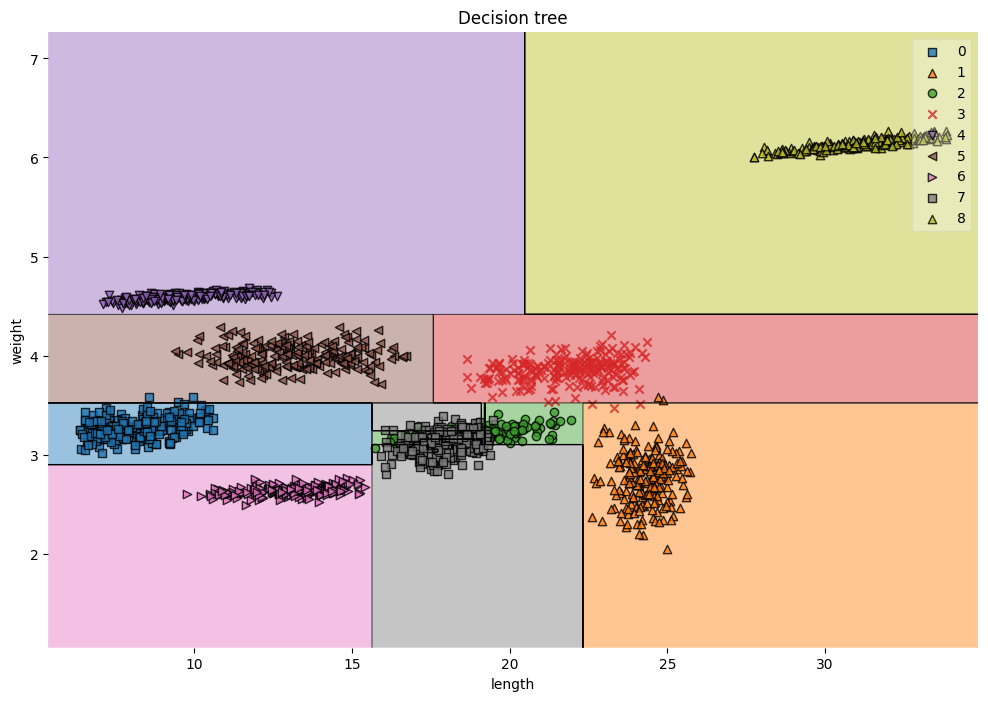

In [163]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plot_decision_regions(data_for_plot, target_for_plot, decision_tree)
plt.xlabel(features_test.columns[0])
plt.ylabel(features_test.columns[1])
plt.title('Decision tree')
plt.show()

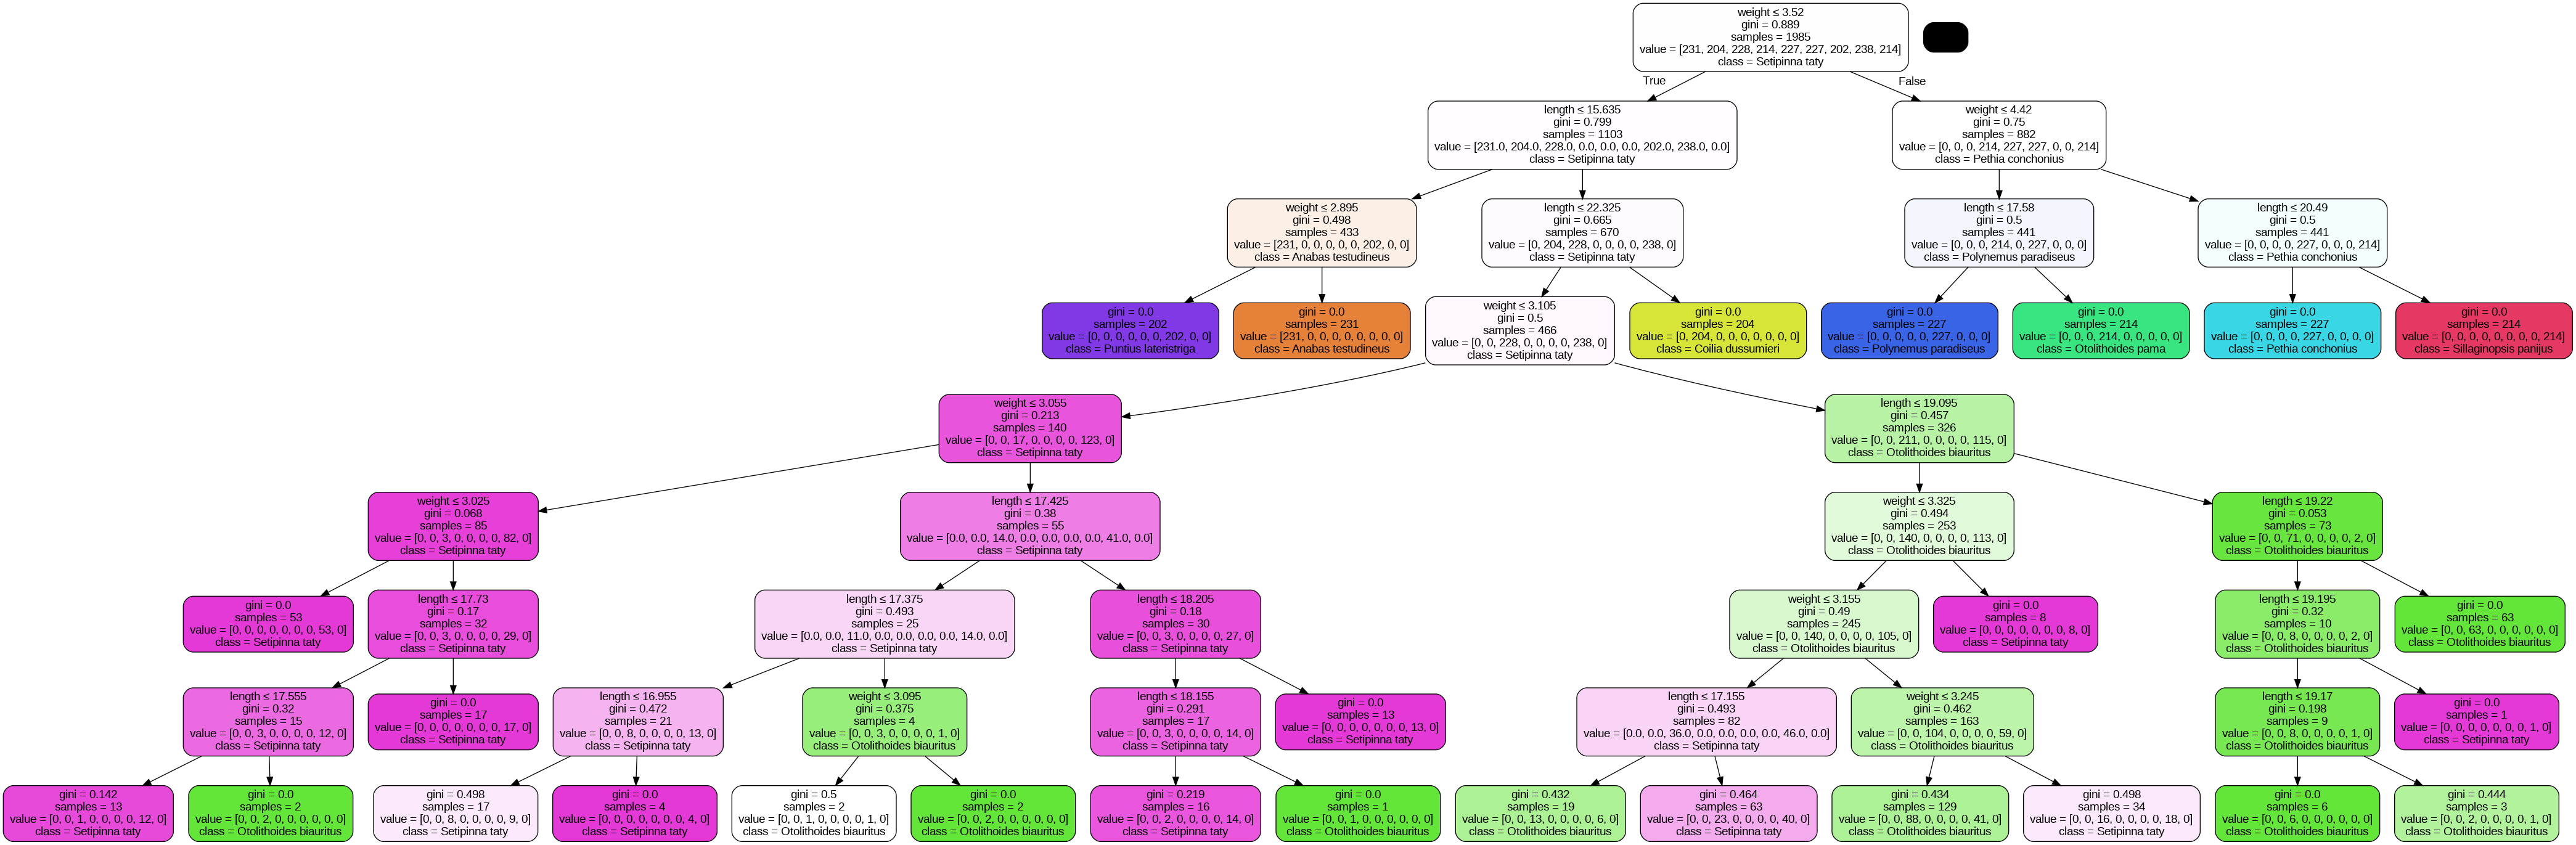

In [164]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(decision_tree,
               out_file=dot_data,
               feature_names=features_test.columns,
               class_names=list(targets_mapped.keys()),
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=1700)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



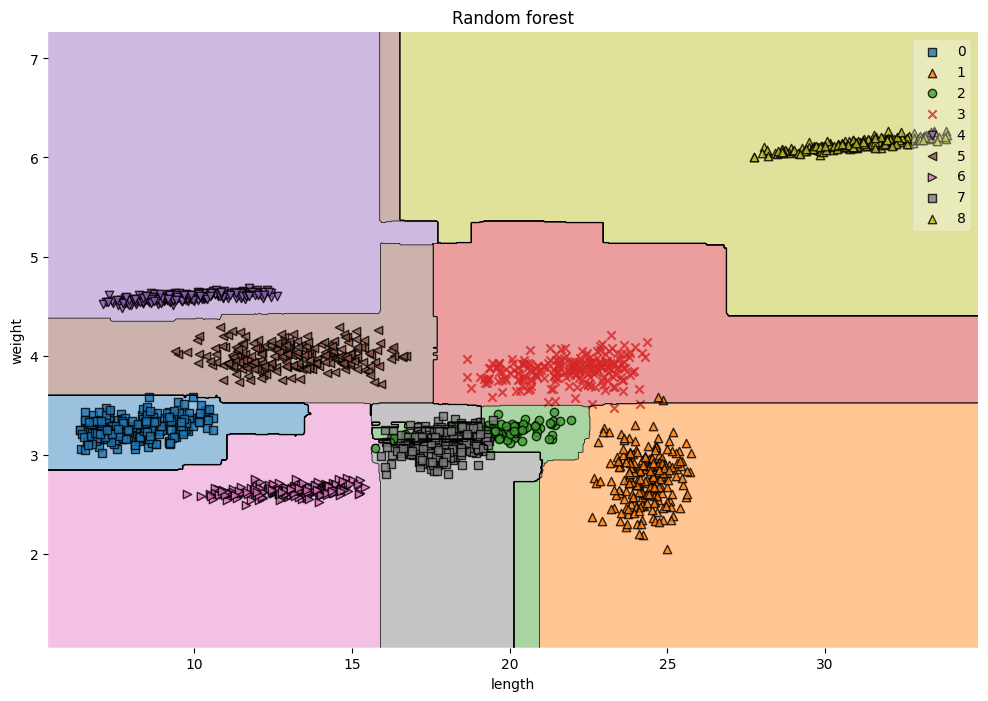

In [165]:
plt.figure(figsize=(12, 8))
plot_decision_regions(data_for_plot, target_for_plot, random_forest)
plt.xlabel(features_test.columns[0])
plt.ylabel(features_test.columns[1])
plt.title('Random forest')
plt.show()

As we can see, Otolithoides Biauritus and Setipinna Taty have similiar weights and lenghts of their body. Let's visualise it

In [166]:
df_filtered = df_raw.copy().drop_duplicates()
df_filtered

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4074,Sillaginopsis panijus,30.61,6.08,0.20
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19


In [167]:
df_filtered = df_filtered[(df_filtered['species'] == 'Otolithoides biauritus') | (df_filtered['species'] == 'Setipinna taty')]
df_filtered

,species,length,weight,w_l_ratio
891,Otolithoides biauritus,20.07,3.18,0.16
892,Otolithoides biauritus,17.21,3.23,0.19
893,Otolithoides biauritus,16.82,3.08,0.18
894,Otolithoides biauritus,17.72,3.18,0.18
895,Otolithoides biauritus,21.43,3.30,0.15
...,...,...,...,...
3620,Setipinna taty,17.98,3.17,0.18
3621,Setipinna taty,17.23,3.20,0.19
3622,Setipinna taty,19.01,3.04,0.16
3623,Setipinna taty,17.97,3.35,0.19


In [168]:
px.scatter(df_filtered, x='length', y='weight', color='species')

Now we can see in better way - those 2 species are mixed in this dataset. Every classifier have lowest scores for those species, while others had 95% accuracy and more.